## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Conclusion](#Conclusion)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [32]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [33]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [34]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [ ]:
df['user_id'].nunique()

d. The proportion of users converted.

In [5]:
# Number of users converted
num = len(df[df['converted']==1])
print(num)

# Proportion of users converted
len(df[df['converted']==1]) / df.shape[0]

35237


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Number of entries where treatment was associated with old_page
num1 = len(df[(df['group']=='treatment') & (df['landing_page']!='new_page')])

# Number of  entries where new_page was associated with control
num2 = len(df[(df['group']=='control') & (df['landing_page']=='new_page')])

# Number of times where new_page and treatment don't match
print(num1+num2)

3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


>**No, There is no missing values.**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='control') & (df['landing_page']=='old_page'))]

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# To check
sum(df2['user_id'].duplicated())

1

In [12]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.loc[[2893]]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(subset='user_id');

In [15]:
# To check 
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# Number of individuals converting 
num = len(df2[df2['converted']==1])
print(num)

# Probability of an individual converting
len(df2[df2['converted']==1]) / df2.shape[0]

34753


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Number of individuals converting 
num = len(df2[(df2['converted']==1) & (df2['group'] == 'control')])
print(num)

# Probability of an individual converting
len(df2[(df2['converted']==1) & (df2['group'] == 'control')]) / len(df2[df2['group'] == 'control'])

17489


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# Number of individuals converting 
num = len(df2[(df2['converted']==1) & (df2['group'] == 'treatment')])
print(num)

# Probability of an individual converting
len(df2[(df2['converted']==1) & (df2['group'] == 'treatment')]) / len(df2[df2['group'] == 'treatment'])

17264


0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
# Number of individuals who received the new page
num = len(df2[df2['landing_page'] == 'new_page'])
print(num)

# Probability that an individuals who received the new page
len(df2[df2['landing_page'] == 'new_page']) / df2.shape[0]

145310


0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> - The probability of an individual converting regardless of the page they receive is **0.1196**
- The probability of an individual converting given that they are from the control group is **0.1204**
- The probability of an individual converting given that they are from the treatment group is **0.1188**
- The probability of an individual received the new page is **0.5001**

>According to the results, we can see that the control group converted at a higher rate than the treatment group, but the rate is still very similar, and the probability that an individual recieved a new page is nearly **0.5**, which means that the probability of each page are balanced. Therefore, there is no sufficient evidence to conclude that the new page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} \ge 0$$
$$H_1: p_{old} - p_{new} < 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
# Assuming p_new and p_old are equal to the converted rate in ab_data.csv regardless of the page. 
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
# Assuming p_new and p_old are equal to the converted rate in ab_data.csv regardless of the page. 
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('landing_page == "new_page"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([1,0], n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1,0], n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
n_mean = new_page_converted.mean()
o_mean = old_page_converted.mean()

diff = n_mean - o_mean
diff

0.00010789679593656287

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = [] 

for _ in range(10000):
    
    new_page_converted = np.random.choice([1,0], n_new, replace = True, p=[p_new, 1-p_new])
    n_mean = new_page_converted.mean()
    
    old_page_converted = np.random.choice([1,0], n_old, replace = True, p=[p_old, 1-p_old])
    o_mean = old_page_converted.mean()
    
    p_diffs.append(n_mean - o_mean)
    
# p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

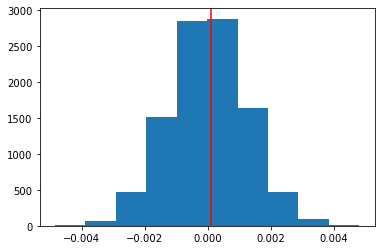

In [28]:
plt.hist(p_diffs);
plt.axvline(x=diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
new_mean = df2.query('group == "treatment"')['converted'].mean()
old_mean = df2.query('group == "control"')['converted'].mean()

act_diff = new_mean - old_mean

(p_diffs > act_diff).mean()

TypeError: '>' not supported between instances of 'list' and 'float'

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>The value that we computed is called the **p-value**. If the **p-value** greater than the typical $\alpha$ level of **0.05**, we would fail to reject the Null hypothesis. 
We **p-value** that we computed is **0.9057**. Therefore, we fail to reject the null hypothesis, and it seems that the old and the new pages perform almost the same.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()

n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [ ]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

z_score, p_value

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [ ]:
from scipy.stats import norm

# Assuming 95% CI 
norm.ppf(1-(0.05))

>The **z_score** we computed is **1.3109** which is less than **1.64485**, and the **p-value** is different than the findings in parts j. and k. Therefore, we fail to reject the null hypothesis, and our conclusion the same as in part k. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression**, since we only have two expected outcomes:
- Conversion
- No conversion

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
# Adding an intercept column
df2['intercept'] = 1

# Creating a dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# To check
df2.head()

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [ ]:
# Instantiating regression model 
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# Fitting the model
results = logit_model.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

results.summary()

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>The **p-value** associated with ab_page is **0.190**, it differ from the **p-value** we found in **Part II** because they have different explanatory variables.
>
>The null and alternative hypotheses for the regression model:
$$H_0: p_{old} - p_{new} = 0$$
$$H_1: p_{old} - p_{new} != 0$$
>
> The null and alternative hypotheses in **Part II** was a one-sided test, where the null and alternative hypotheses for the regression model, is two-sided test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> It is a good idea to consider other factors to add to the regression model, because it may contribute to the significance of the results and leads to more accurate decisions. However, even with additional factors, we still can not consider all influencing factors. So, it may lead to correlated errors and multicollinearity.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
# Reading the 'countries.csv' dataset and store it in countries_df
countries_df = pd.read_csv('countries.csv')

# Merge together the datasets
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

In [ ]:
df_new.groupby('country').count()

In [ ]:
df_new[['CA','UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

In [ ]:
df_new['intercept'] = 1

logit_model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])

result2 = logit_model2.fit()
result2.summary()

In [ ]:
np.exp(result2.params)

In [ ]:
1/np.exp(result2.params)

>Based on the statistical output: 
- If an individual lives in US, they are **0.96** times more likely to be converted while holding all other variables constant.
- If an individual lives in UK, they are **0.95** times more likely to be converted while holding all other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
df_new['UK_page'] = df_new['ab_page']*df_new['UK']
df_new['US_page'] = df_new['ab_page']*df_new['US']

df_new.head()

In [ ]:
logit_model3 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page', 'UK_page', 'US_page']])

result3 = logit_model3.fit()
result3.summary()

In [ ]:
np.exp(result3.params)

In [ ]:
1/np.exp(result3.params)

> **Results:** Since the **p-values** exceed 0.05, None of them are significant. Therefore, we fail to reject the null hypothesis, And we conclude that there is not sufficient evidence that there is an interaction between the country and the page received that predicts whether or not the user is converting.

## Conclusion
The old and new pages have similar performance, although the old page was found to perform a little better. Therefore, the new page should not be implemented by the company, as there is no sufficient evidence that it perform better than the old page.

## Rescources

 + [pandas](https://pandas.pydata.org/docs/index.html)
 + [numpy](https://numpy.org)
 + [stackoverflow](https://stackoverflow.com)

<a id='conclusions'></a>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])